In [6]:
import numpy as np
import pandas as pd

import os
import shutil

from glob import glob 
from skimage.io import imread
import gc

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from DataGenerator import CreateData

In [7]:
createData = CreateData()
createData.create_directory()

C:\Users\dzhal\Рабочий стол\informtelecs\DataGenerator.py:153: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 10))  # think about scale
C:\Users\dzhal\Рабочий стол\informtelecs\DataGenerator.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 10))
C:\Users\dzhal\Рабочий стол\informtelecs\DataGenerator.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  y = 1/koef * np.array(x) if i == 0 else koef * np.array(x)
C:\Users\dzhal\Рабочий стол\informtelecs\DataGenerator.py:108: Runtime

In [8]:
smth_base = "D:informconnection\\"
base_tile_dir = smth_base + 'lake\\*'
df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir, '*.jpg'))})
df['target'] = df['path'].apply(lambda x: x.split('\\')[2])

In [9]:
df.head()

,path,target
0,D:informconnection\lake\exp\exp_rotate1.jpg,exp
1,D:informconnection\lake\exp\exp_rotate10.jpg,exp
2,D:informconnection\lake\exp\exp_rotate100.jpg,exp
3,D:informconnection\lake\exp\exp_rotate101.jpg,exp
4,D:informconnection\lake\exp\exp_rotate102.jpg,exp


In [10]:
import PIL
from PIL import Image
def external_scale(x):
    image = Image.open(x)
    img = image.resize((200, 200), PIL.Image.ANTIALIAS)
    img.save(x)

In [11]:
from collections import Counter
df['path'].apply(lambda x: external_scale(x));

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras_radam import RAdam

kernel_size = (3,3)
pool_size= (2,2)
first_filters = 16
second_filters = 32

dropout_conv = 0.5
dropout_dense = 0.7

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (200, 200, 3)))
model.add(Conv2D(first_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(second_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(64, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(3, activation = "softmax"))

# Compile the model
model.compile(RAdam(0.0001), loss = "binary_crossentropy", metrics=["accuracy"])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 16)      2304      
_________________________________________________________________
batch_normalization_1 (Batch (None, 196, 196, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 196, 196, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)  

# now it's time for advanture

In [13]:
df_data = shuffle(df).reset_index(drop=True)

y = df_data['target']
df_train, df_test = train_test_split(df_data, random_state=101, stratify=y)
smth_base = "D:informconnection\\"
print(len(df_train), len(df_data), len(df_test))
for image in df_train['path'].values:
    src = os.path.join(image)
    dst = os.path.join(smth_base + 'train', '\\'.join(image.split('\\')[2:]))
    shutil.copyfile(src, dst)
for image in df_test['path'].values:
    src = os.path.join(image)
    dst = os.path.join(smth_base + 'test', '\\'.join(image.split('\\')[2:]))
    shutil.copyfile(src, dst)

1569 2092 523


In [14]:
df_data = shuffle(df).reset_index(drop=True)
smth_base = "D:informconnection\\"
df_train, df_test = train_test_split(df_data, stratify=y)
for image in df_train['path'].values:
    src = os.path.join(image)
    dst = os.path.join(smth_base + 'train', '\\'.join(image.split('\\')[2:]))
    print(src, dst)

D:informconnection\lake\sin_cos\_sinCos_400.jpg D:informconnection\train\sin_cos\_sinCos_400.jpg
D:informconnection\lake\linear\_linear_21.jpg D:informconnection\train\linear\_linear_21.jpg
D:informconnection\lake\linear\_linear_351.jpg D:informconnection\train\linear\_linear_351.jpg
D:informconnection\lake\exp\_exp_12.jpg D:informconnection\train\exp\_exp_12.jpg
D:informconnection\lake\tan\_tan_120.jpg D:informconnection\train\tan\_tan_120.jpg
D:informconnection\lake\linear\_linear_239.jpg D:informconnection\train\linear\_linear_239.jpg
D:informconnection\lake\exp\exp_rotate130.jpg D:informconnection\train\exp\exp_rotate130.jpg
D:informconnection\lake\sin_cos\_sinCos_359.jpg D:informconnection\train\sin_cos\_sinCos_359.jpg
D:informconnection\lake\linear\_linear_228.jpg D:informconnection\train\linear\_linear_228.jpg
D:informconnection\lake\sin_cos\_sinCos_289.jpg D:informconnection\train\sin_cos\_sinCos_289.jpg
D:informconnection\lake\tan\_tan_249.jpg D:informconnection\train\tan\_tan

D:informconnection\lake\sin_cos\_sinCos_139.jpg D:informconnection\train\sin_cos\_sinCos_139.jpg
D:informconnection\lake\sin_cos\_sinCos_440.jpg D:informconnection\train\sin_cos\_sinCos_440.jpg
D:informconnection\lake\exp\_exp_93.jpg D:informconnection\train\exp\_exp_93.jpg
D:informconnection\lake\exp\_exp_52.jpg D:informconnection\train\exp\_exp_52.jpg
D:informconnection\lake\tan\_tan_128.jpg D:informconnection\train\tan\_tan_128.jpg
D:informconnection\lake\sin_cos\_sinCos_461.jpg D:informconnection\train\sin_cos\_sinCos_461.jpg
D:informconnection\lake\linear\_linear_308.jpg D:informconnection\train\linear\_linear_308.jpg
D:informconnection\lake\linear\linear_rotate300.jpg D:informconnection\train\linear\linear_rotate300.jpg
D:informconnection\lake\sin_cos\_sinCos_532.jpg D:informconnection\train\sin_cos\_sinCos_532.jpg
D:informconnection\lake\sin_cos\_sinCos_17.jpg D:informconnection\train\sin_cos\_sinCos_17.jpg
D:informconnection\lake\sin_cos\_sinCos_126.jpg D:informconnection\train

In [15]:
smth_base = "D:informconnection\\"
base_tile_dir = smth_base + 'test\\*'
df_check = pd.DataFrame({'path': glob(os.path.join(base_tile_dir, '*.jpg'))})
df_check

,path
0,D:informconnection\test\exp\exp_rotate10.jpg
1,D:informconnection\test\exp\exp_rotate102.jpg
2,D:informconnection\test\exp\exp_rotate103.jpg
3,D:informconnection\test\exp\exp_rotate106.jpg
4,D:informconnection\test\exp\exp_rotate109.jpg
5,D:informconnection\test\exp\exp_rotate112.jpg
6,D:informconnection\test\exp\exp_rotate12.jpg
7,D:informconnection\test\exp\exp_rotate125.jpg
8,D:informconnection\test\exp\exp_rotate134.jpg
9,D:informconnection\test\exp\exp_rotate153.jpg


In [16]:
import tensorflow as tf

In [17]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [21]:
BATCH_SIZE = 16
CLASS_NAMES = ['exp', 'sin_cos', 'linear']
STEPS_PER_EPOCH_TRAIN = np.ceil(len(df_train)/BATCH_SIZE)
STEPS_PER_EPOCH_TEST = np.ceil(len(df_test)/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory="D:informconnection\\train",
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(200, 200),
                                                     classes=CLASS_NAMES)
test_data_gen = image_generator.flow_from_directory(directory="D:informconnection\\test",
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    target_size=(200, 200),
                                                    classes=CLASS_NAMES)

Found 1367 images belonging to 3 classes.
Found 455 images belonging to 3 classes.


In [19]:
import matplotlib.pyplot as plt
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
#       plt.title(CLASS_NAMES[label_batch[n]])
      plt.axis('off')
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

C:\Users\dzhal\Anaconda3\envs\neural_network\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: index 16 is out of bounds for axis 0 with size 16

<IPython.core.display.Javascript object>


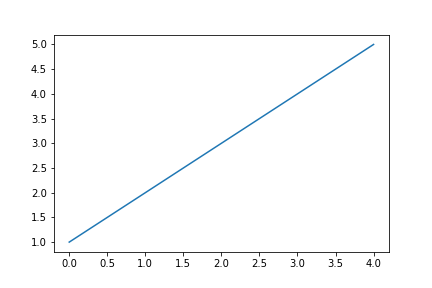

In [40]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("nbAgg")
plt.plot([1, 2, 3, 4, 5])

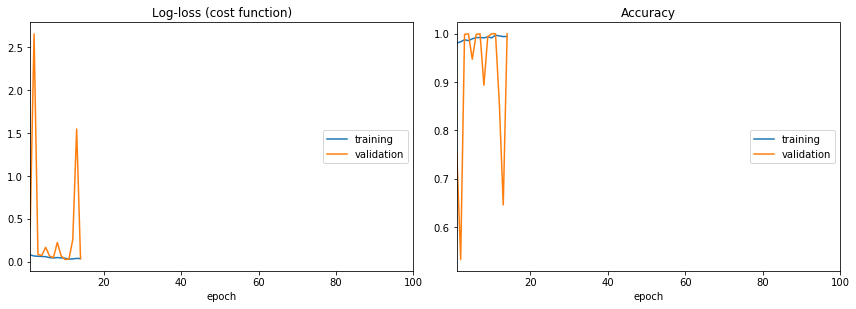

Log-loss (cost function):
training   (min:    0.028, max:    0.078, cur:    0.035)
validation (min:    0.024, max:    2.656, cur:    0.035)

Accuracy:
training   (min:    0.981, max:    0.997, cur:    0.994)
validation (min:    0.532, max:    1.000, cur:    1.000)

Epoch 00014: val_loss did not improve from 0.02396
Epoch 15/100
74/99 [=====================>........] - ETA: 1s - loss: 0.0277 - acc: 0.9972

KeyboardInterrupt: 

In [42]:
from livelossplot import PlotLossesKeras
%matplotlib inline
# matplotlib.use('Qt5Agg')
directory = "D://some_weights"
if not os.path.exists(directory):
    os.mkdir(directory)
checkpoint_path = "D://some_weights//cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # Сохраняем веса через каждые 5 эпох
    period=1, save_best_only=True)
model.fit_generator(
    train_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH_TRAIN,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=STEPS_PER_EPOCH_TEST,
    callbacks=[PlotLossesKeras(), cp_callback])

In [1]:
# %matplotlib inline
plt.plot([1, 2, 3])

NameError: name 'plt' is not defined

In [144]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
model.predict_generator(test_data_gen, steps=len(df_test), verbose=1)

523/523 [==============================] - 13s 25ms/step


array([[3.53744999e-03, 9.81892049e-01, 1.45705035e-02],
       [1.54097332e-02, 9.17197764e-01, 6.73924983e-02],
       [1.75418444e-02, 3.56770530e-02, 9.46781039e-01],
       ...,
       [9.74154472e-01, 7.46665429e-03, 1.83787756e-02],
       [7.50575913e-04, 9.97586370e-01, 1.66299427e-03],
       [9.92769241e-01, 2.69643171e-03, 4.53431578e-03]], dtype=float32)

[[9.72252727e-01 7.16443779e-03 2.05828659e-02]
 [3.70850461e-03 6.22867653e-03 9.90062773e-01]
 [2.72795768e-03 4.55626892e-03 9.92715776e-01]
 [1.37155857e-02 1.99968293e-02 9.66287553e-01]
 [9.90500391e-01 3.48186400e-03 6.01779763e-03]
 [1.57186948e-02 3.26291882e-02 9.51652110e-01]
 [4.72006723e-02 5.05852774e-02 9.02214110e-01]
 [1.34383282e-02 2.89808121e-02 9.57580924e-01]
 [1.64843502e-03 9.93882418e-01 4.46923450e-03]
 [1.09449332e-03 9.97090936e-01 1.81455456e-03]
 [1.18262535e-02 9.32462513e-01 5.57112955e-02]
 [4.09458466e-02 4.67011966e-02 9.12352920e-01]
 [3.70767489e-02 5.44131100e-02 9.08510089e-01]
 [1.73026288e-03 3.62563855e-03 9.94644165e-01]
 [8.59212945e-04 9.97472465e-01 1.66823575e-03]
 [5.37655503e-02 7.37281740e-02 8.72506320e-01]] [[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


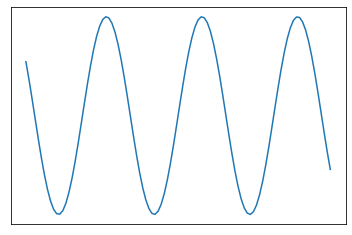

In [161]:
fig = plt.gca()
x = np.linspace(-10, 10, 100)
plt.plot(np.sin(x))
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("fig.jpg")

In [164]:
def external_scale(x):
    image = Image.open(x)
    img = image.resize((200, 200), PIL.Image.ANTIALIAS)
    img.save(x)
    return img
jpg = external_scale("fig.jpg")

In [123]:
jpg = np.array(jpg)
model.load_weights("D://some_weights//cp.ckpt")
# model.decision_function(jpg)

In [165]:
jpg = np.array(jpg)/255
jpg = np.expand_dims(jpg, axis=0)

In [166]:
predicted_value = model.predict(jpg)
print(predicted_value)
CLASS_NAMES

[[7.1491470e-04 9.9901712e-01 2.6793583e-04]]


['exp', 'sin_cos', 'linear']

In [109]:
list(jpg)

TypeError: 'Image' object is not iterable